In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [2]:
df = pd.read_csv("WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

## Exploratory Analysis

In [4]:
print("Loading wine quality dataset...")
print(f"\nDataset Shape: {df.shape}")
print(f"Features: {list(df.columns)}")
print(f"Target Variable: quality")
print(df.info())

Loading wine quality dataset...

Dataset Shape: (1143, 13)
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']
Target Variable: quality
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float6

In [5]:
print("\nBasic Statistics:")
df.describe()


Basic Statistics:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


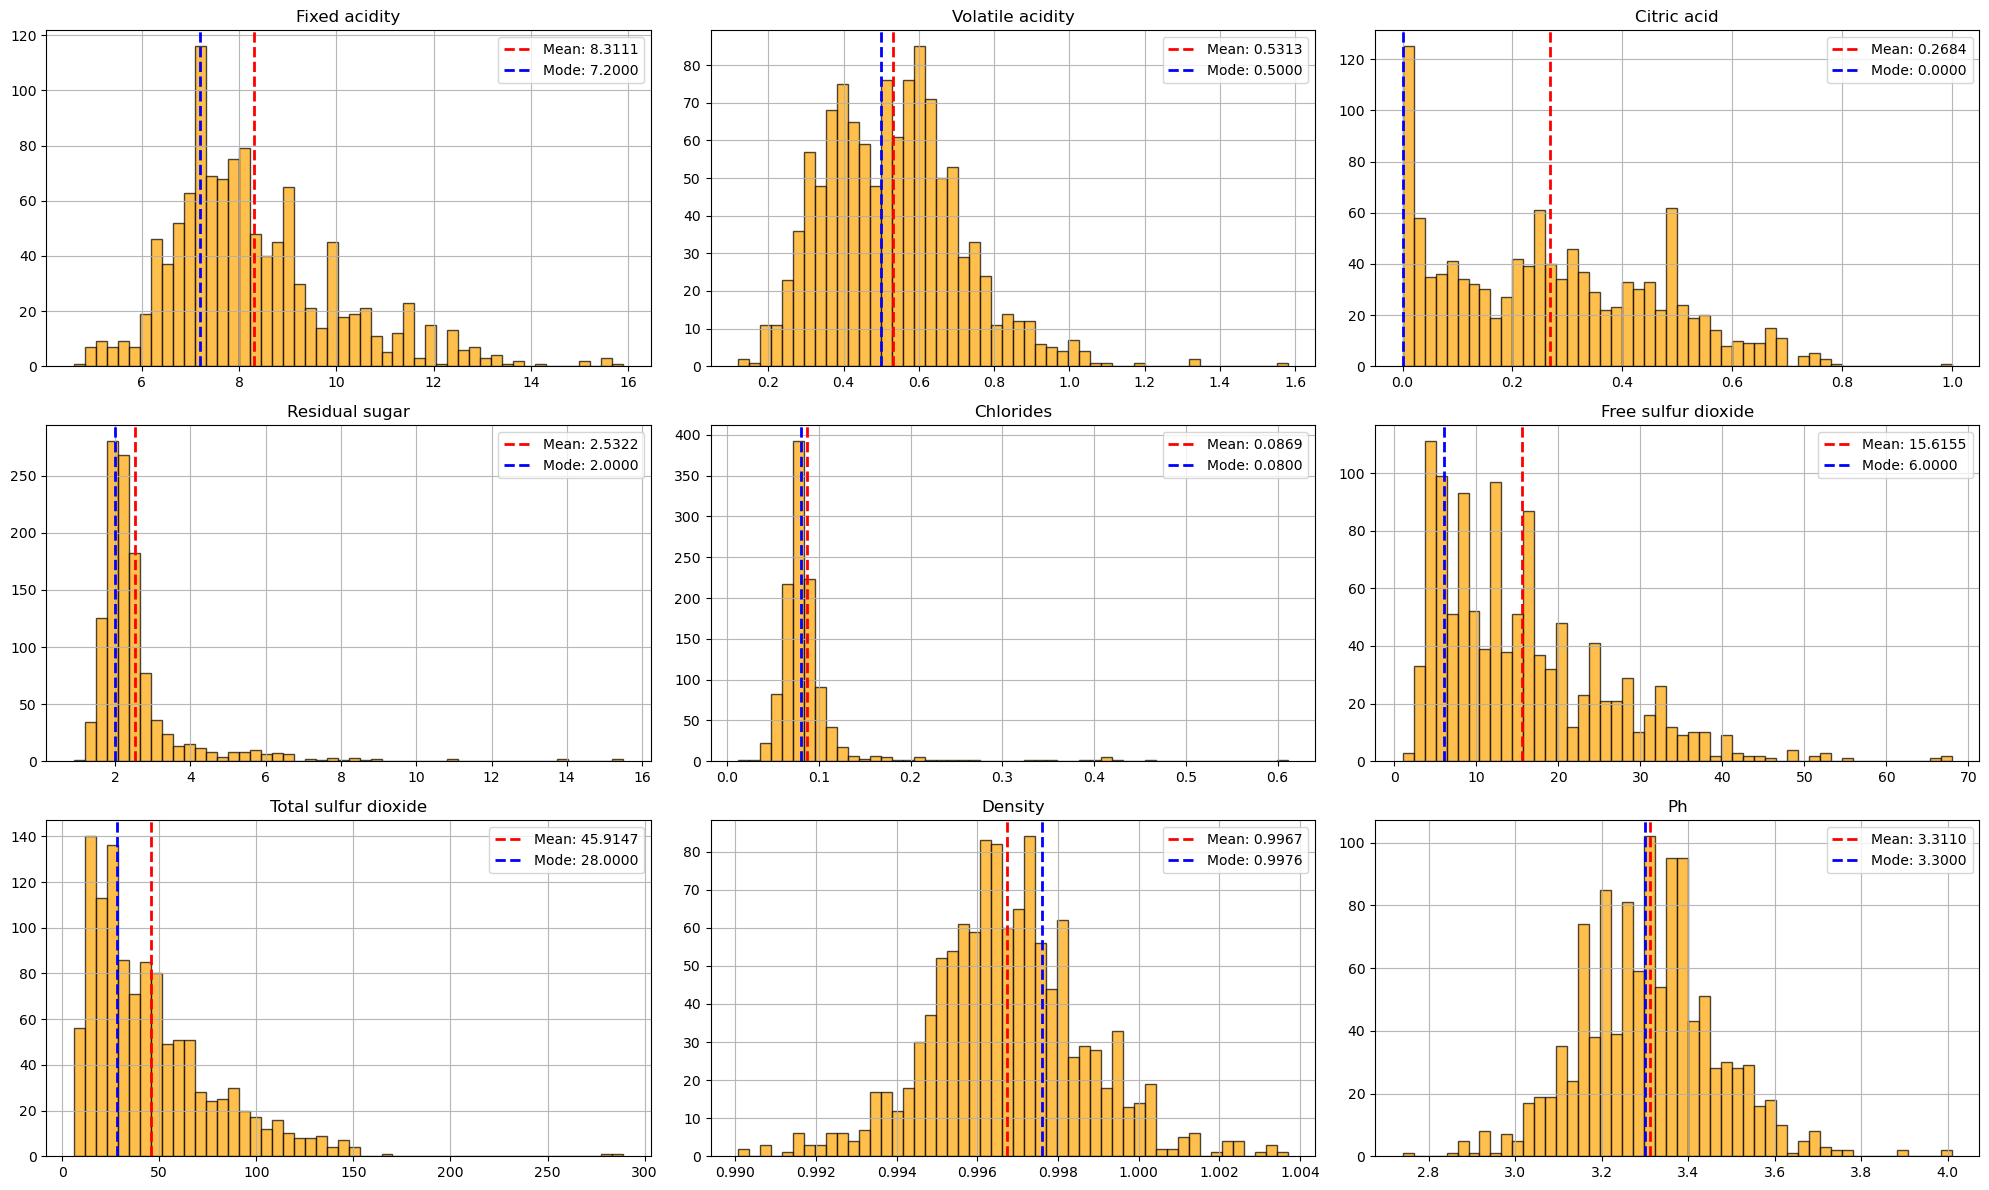

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Create the histogram
fig, axes = plt.subplots(3,3, figsize=(20, 12))
axes = axes.flatten()

# Plot histograms with mean and mode
for i, col in enumerate(df.columns):
    if i < len(axes):
        # Plot histogram
        axes[i].hist(df[col], bins=50, color='orange', alpha=0.7, edgecolor='black')
        
        # Calculate and mark mean
        mean_val = df[col].mean()
        axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.4f}')
        
        # Calculate and mark mode
        mode_val = df[col].mode().iloc[0]
        axes[i].axvline(mode_val, color='blue', linestyle='--', linewidth=2, label=f'Mode: {mode_val:.4f}')
        
        axes[i].set_title(f'{col.capitalize()}')
        axes[i].legend()
        axes[i].grid(True, alpha=0.9)

plt.tight_layout()
plt.show()

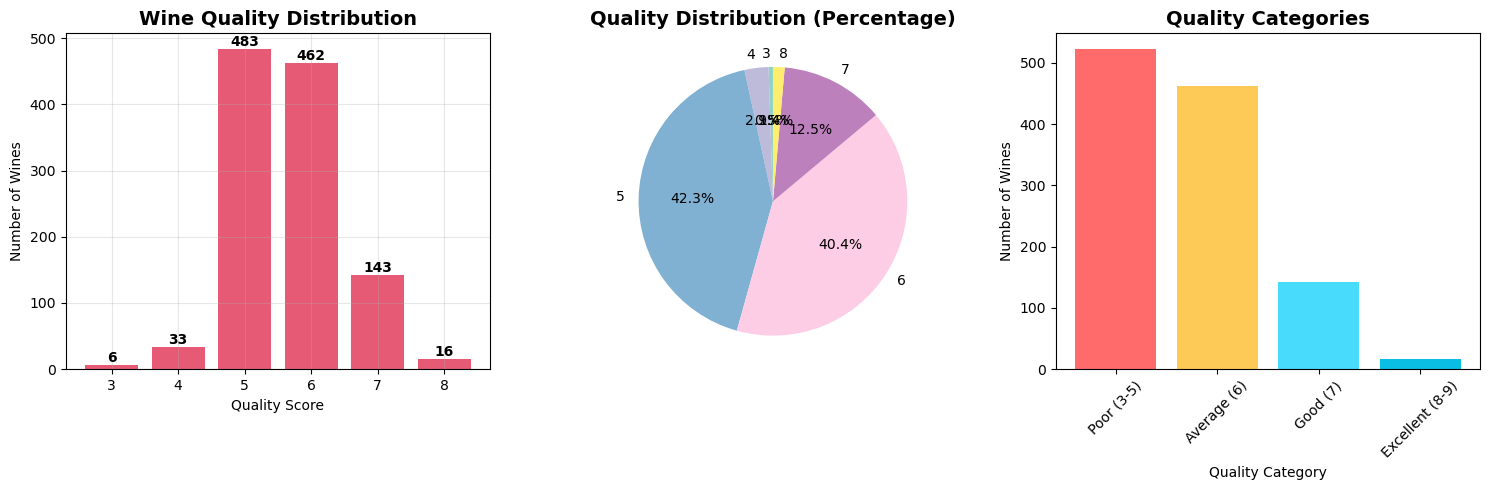

In [7]:
import matplotlib.pyplot as mlp

def plot_quality_distribution(df):
    plt.figure(figsize=(15, 5))

    # Bar graph to plot the Quality score vs Frequency 
    plt.subplot(1, 3, 1)
    quality_counts = df['quality'].value_counts().sort_index()
    bars = plt.bar(quality_counts.index, quality_counts.values, color='crimson', alpha=0.7)
    plt.title('Wine Quality Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Quality Score')
    plt.ylabel('Number of Wines')
    plt.grid(True, alpha=0.3)
    # To get the highest frequency values and to display on top of each bar 
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height ,
                 f'{int(height)}', ha='center', va='bottom', fontweight='bold')
        
    # Pie chart 
    plt.subplot(1, 3, 2)
    plt.pie(quality_counts.values, labels=quality_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=plt.cm.Set3(np.linspace(0, 1, len(quality_counts))))
    plt.title('Quality Distribution (Percentage)', fontsize=14, fontweight='bold')

    #Quality Categories Bar - graph
    plt.subplot(1, 3, 3)
    quality_categories = pd.cut(df['quality'], bins=[0, 5, 6, 7, 10],       #To get intervaled of quality
                               labels=['Poor (3-5)', 'Average (6)', 'Good (7)', 'Excellent (8-9)'])
    category_counts = quality_categories.value_counts()
    plt.bar(category_counts.index, category_counts.values, 
            color=['#ff6b6b', '#feca57', '#48dbfb', '#0abde3'])
    plt.title('Quality Categories', fontsize=14, fontweight='bold')
    plt.xlabel('Quality Category')
    plt.ylabel('Number of Wines')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_quality_distribution(df)

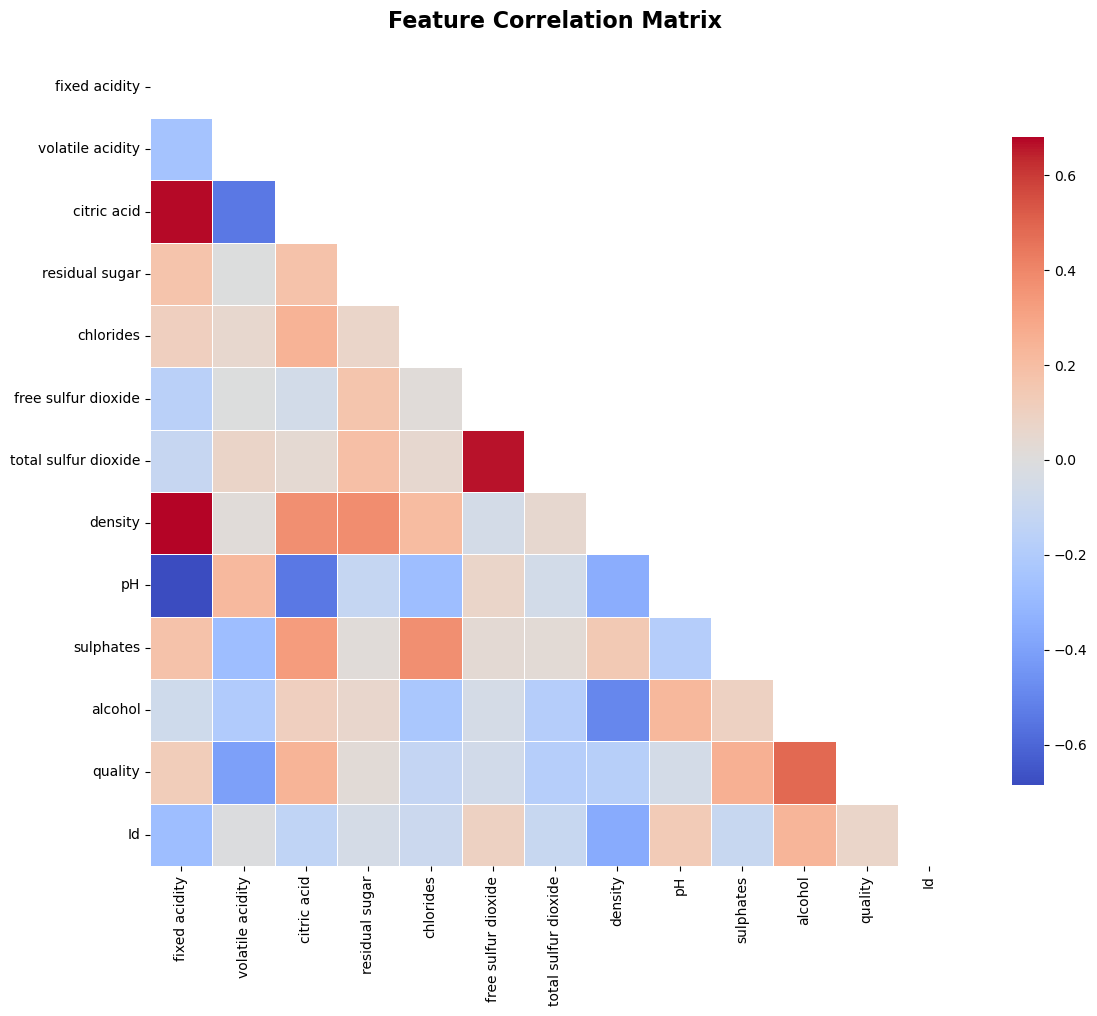

In [8]:
def plot_correlation_heatmap(df):
    plt.figure(figsize=(12, 10))
    df_numeric = df.select_dtypes(include=[np.number])
    correlation_matrix = df_numeric.corr(numeric_only=True)
    
    # Masking Upper-Triangle of the Correlation Matrix
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    # Create heatmap with annotations
    sns.heatmap(correlation_matrix, 
                mask=mask,  
                cmap='coolwarm', 
                center=0,
                linewidths=0.5,
                annot=True,  # This adds the correlation values as text
                fmt='.2f',   # Format to 2 decimal places
                square=True, # Make tiles square
                cbar_kws={'shrink': 0.8})  # Adjust colorbar size
    
    plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    return correlation_matrix

correlation_matrix = plot_correlation_heatmap(df)

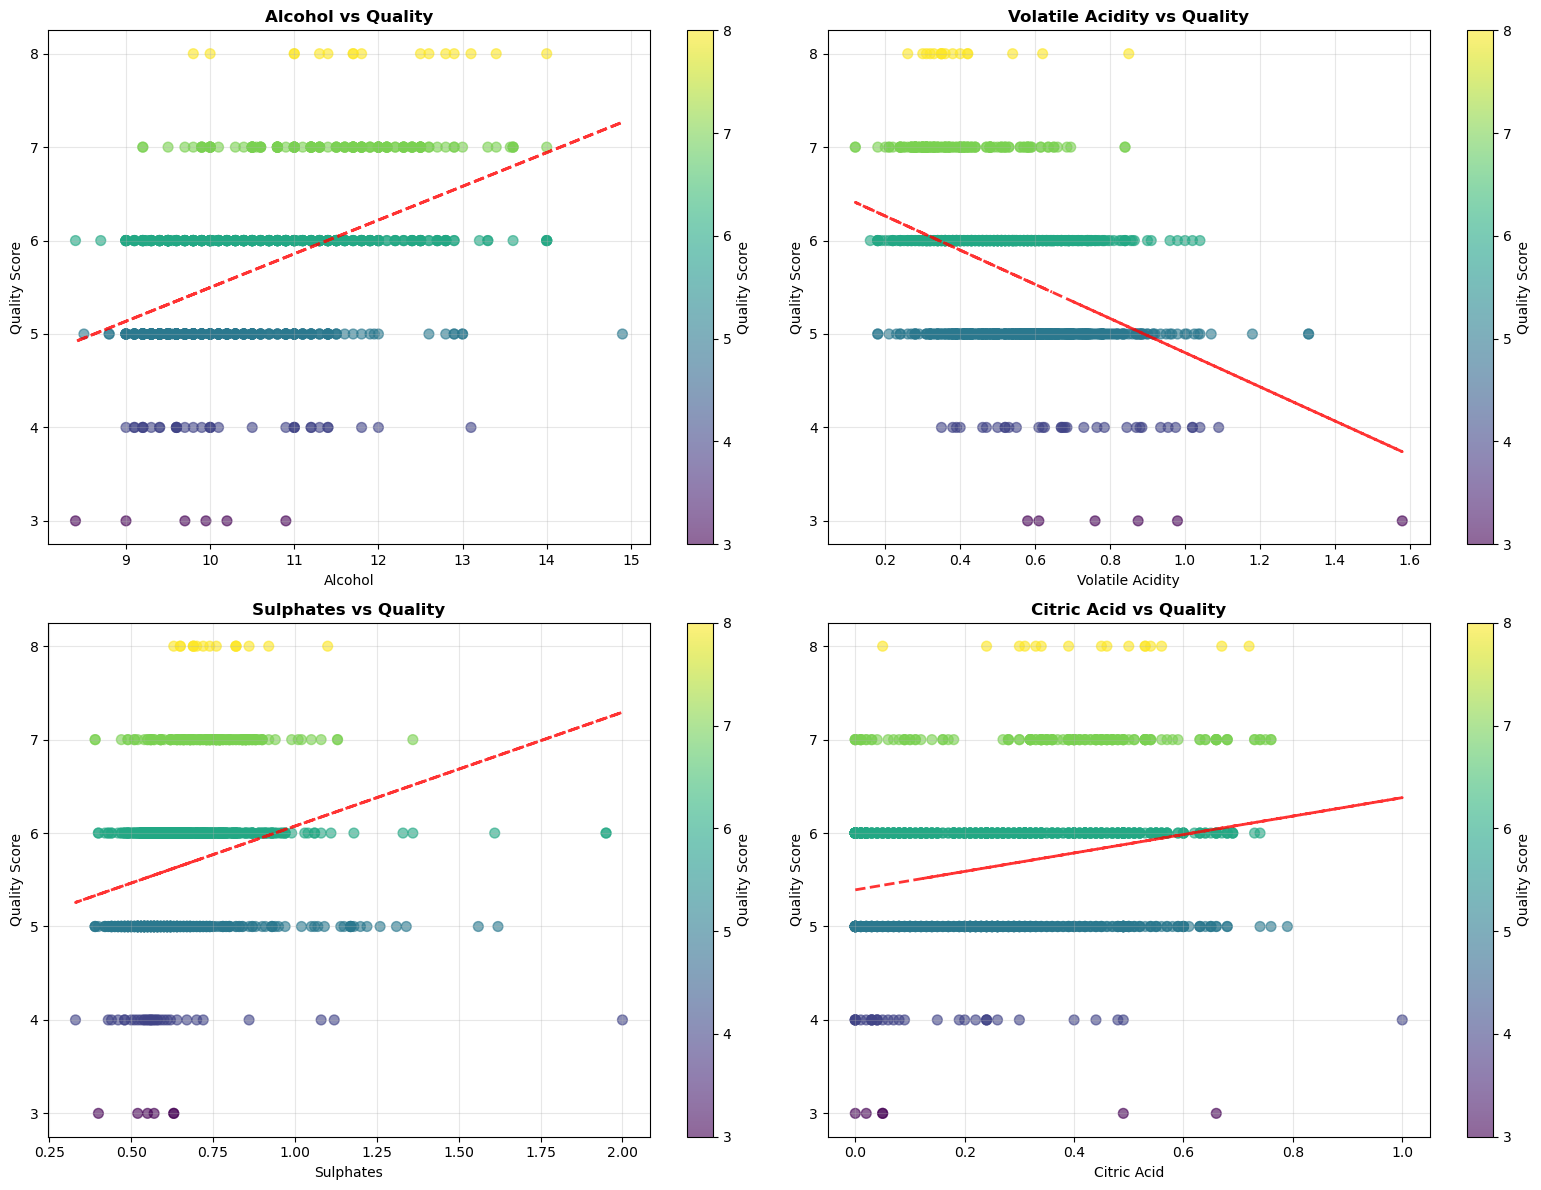

In [9]:
#Quality VS feature having more Co-Relation

def plot_pairwise_relationships(df):


    #Get four most correlated feature from dataframe
    correlation_matrix = df.corr()
    feature_importance = correlation_matrix['quality'].abs().sort_values(ascending=False).drop('quality')
    top_correlations = feature_importance.head(4).index.tolist() #Convert important feature to list
    
    plt.figure(figsize=(16, 12))
    for i, feature in enumerate(top_correlations, 1):
        plt.subplot(2, 2, i) 
        scatter = plt.scatter(df[feature], df['quality'], c=df['quality'], 
                             cmap='viridis', alpha=0.6, s=50)
        
        z = np.polyfit(df[feature], df['quality'],1) # get the polynomial function slope and intercept after fitting
        p = np.poly1d(z) # Obtain the equation of straight-line,i.e linear regression p(x) = slope * x + intercept
        plt.plot(df[feature], p(df[feature]), "r--", alpha=0.8, linewidth=2)
        
        plt.title(f'{feature.title()} vs Quality', fontweight='bold')
        plt.xlabel(feature.title())
        plt.ylabel('Quality Score')
        plt.colorbar(scatter, label='Quality Score')
        plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_pairwise_relationships(df)

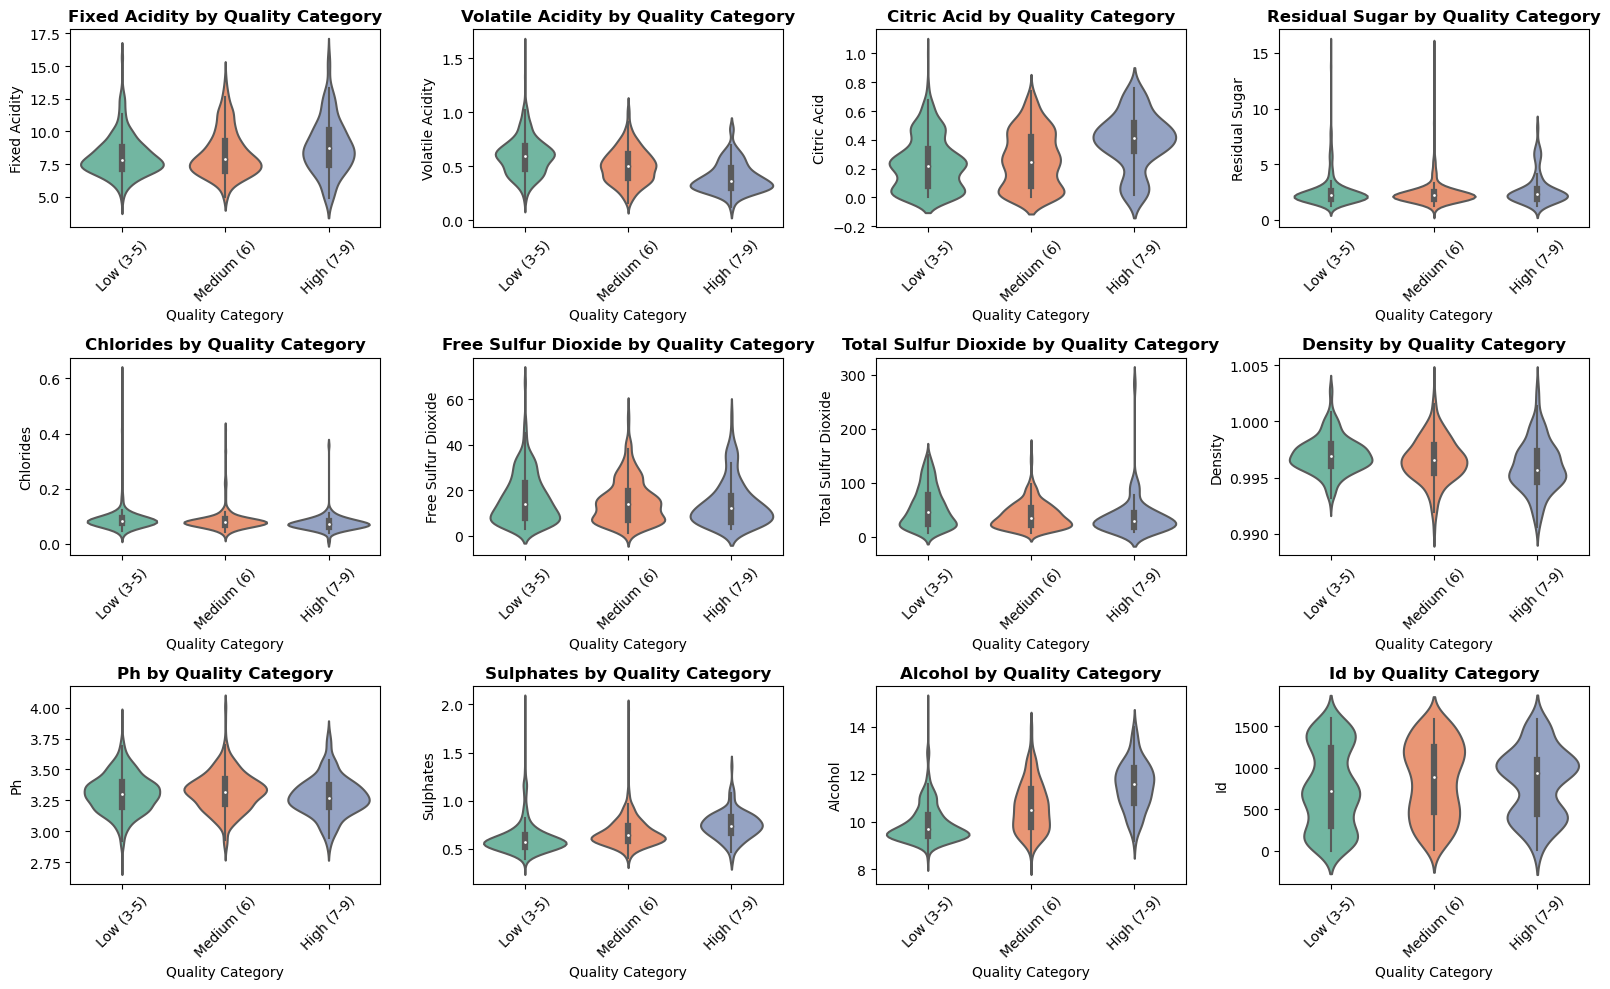

In [10]:
#Categorise each feature based on Quality score classes  

def plot_quality_categorise(df):
    features = df.drop('quality', axis=1).columns
    df['quality_category'] = pd.cut(df['quality'], bins=[0, 5, 6, 10], 
                                   labels=['Low (3-5)', 'Medium (6)', 'High (7-9)'])
    plt.figure(figsize=(16, 10))
    for i, feature in enumerate(features, 1):
        plt.subplot(3, 4, i)
        sns.violinplot(x='quality_category', y=feature, data=df, palette='Set2')
        plt.title(f'{feature.title()} by Quality Category', fontweight='bold')
        plt.xlabel('Quality Category')
        plt.ylabel(feature.title())
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_quality_categorise(df)

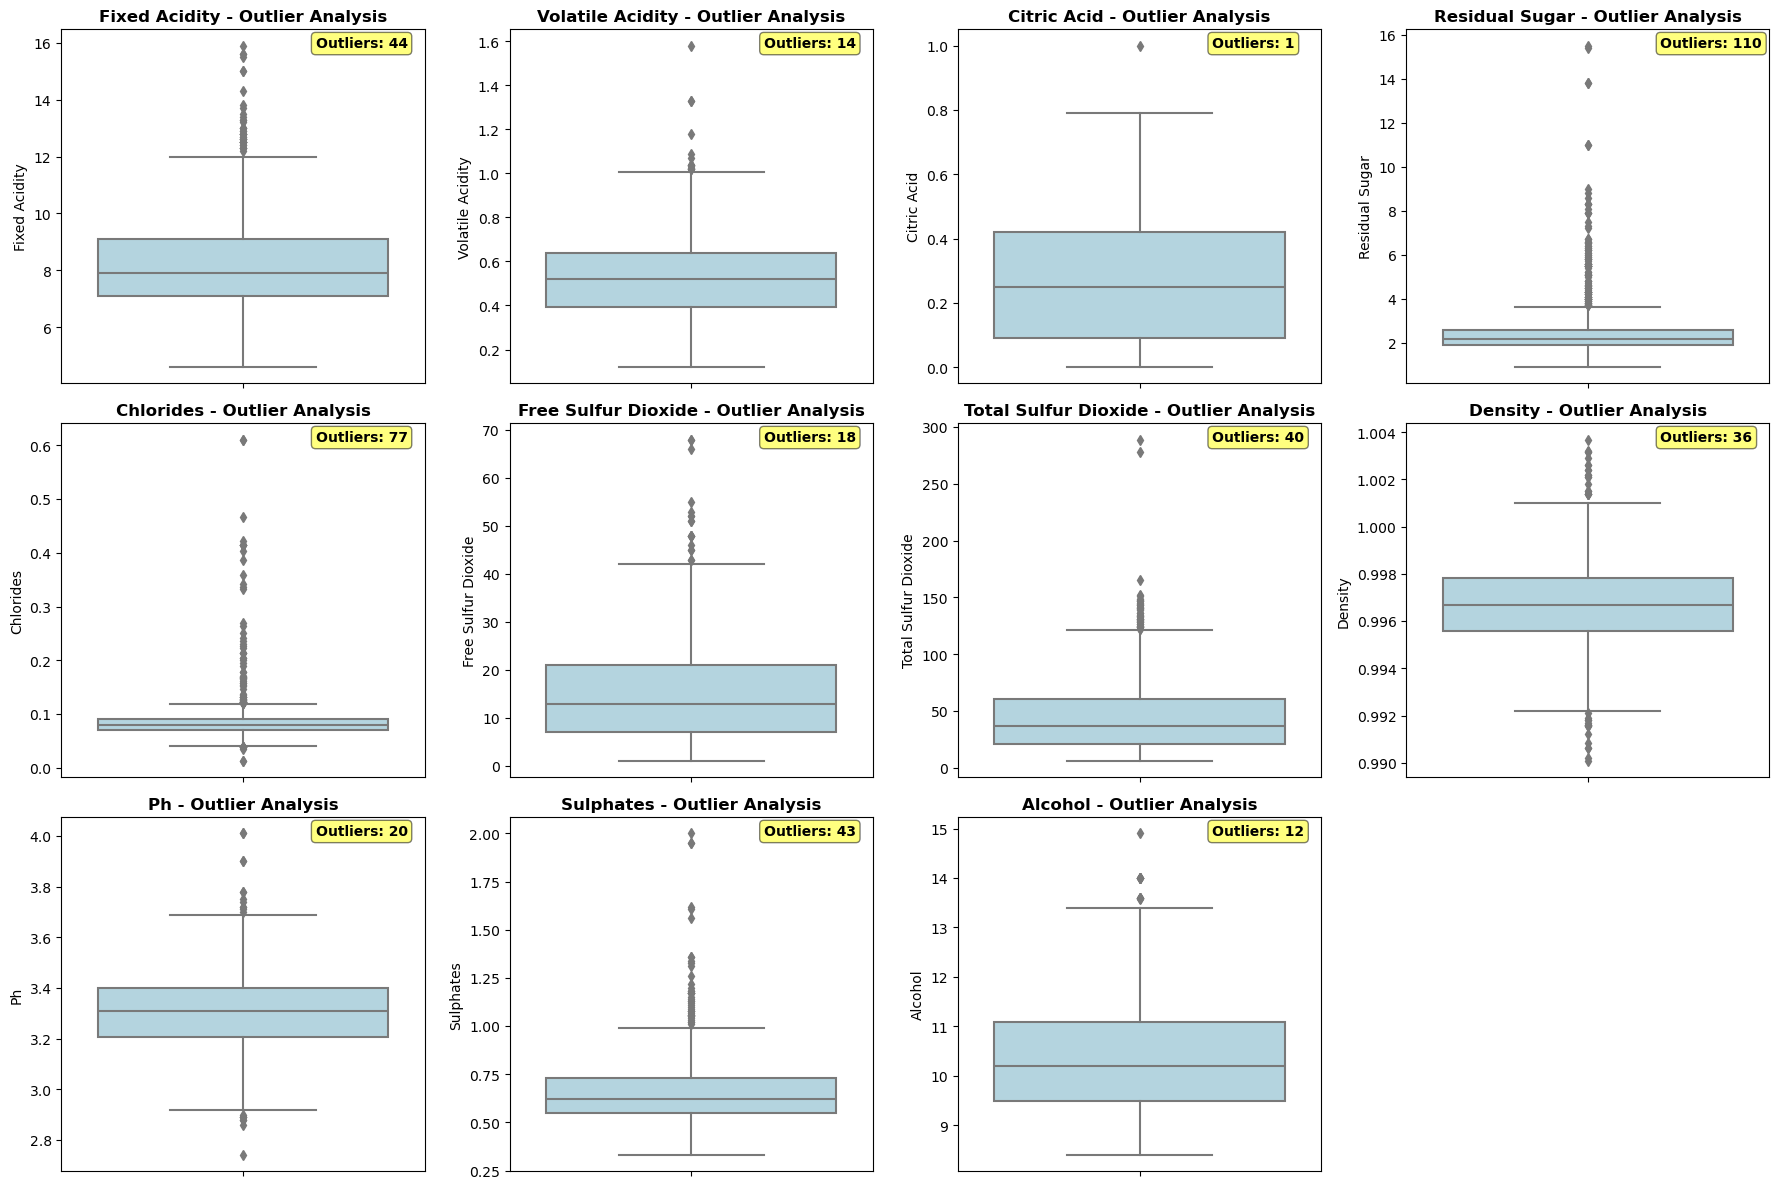

In [20]:
#Sum of Outliers of each features

def plot_outliers(df):
    features = df.drop(['quality','Id'], axis=1).columns
    plt.figure(figsize=(18, 12))
    for i, feature in enumerate(features, 1):
        plt.subplot(3, 4, i)
        sns.boxplot(y=df[feature], color='lightblue')
        plt.title(f'{feature.title()} - Outlier Analysis', fontweight='bold')
        plt.ylabel(feature.title())
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[feature] < Q1 - 1.5*IQR) | (df[feature] > Q3 + 1.5*IQR)]
        plt.text(.7, 0.98, f'Outliers: {len(outliers)}', transform=plt.gca().transAxes, 
                 verticalalignment='top', fontweight='bold',bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
    plt.tight_layout()
    plt.show()

plot_outliers(df)

In [17]:
df = pd.read_csv("WineQT.csv")
x = df.drop(['quality', 'Id'],axis = 1)
y = df['quality']

In [18]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y, test_size = 0.2, random_state = 2)

In [23]:
from sklearn.linear_model import ElasticNet

# Create the ElasticNet model
elastic_net = ElasticNet(alpha = 0.1, l1_ratio=0.5, random_state=2)

# Fit the model to the training data
elastic_net.fit(x_train, y_train)

# Now you can use the model to predict on new data, e.g., x_test
y_pred = elastic_net.predict(x_test)

# (Optional) To check model performance:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Regression metric to evaluate 
def elvaulating_metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return mae , r2 , rmse  
mae , r2 , rmse= elvaulating_metrics(y_test, y_pred)

print('root Mean squared Error:', rmse)
print('Mean squared Error:', mae)
print('R-squared(Residual Error):', r2)

root Mean squared Error: 0.7195084108073855
Mean squared Error: 0.5713062425671057
R-squared(Residual Error): 0.22570575850365782


In [24]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
for name, coef in zip(columns , elastic_net.coef_):
    print(f"{name}: {coef}")

fixed acidity: 0.05595159792529311
volatile acidity: -0.0
citric acid: 0.0
residual sugar: -0.0
chlorides: -0.0
free sulfur dioxide: 0.008425087712408607
total sulfur dioxide: -0.00477845343519379
density: -0.0
pH: -0.0
sulphates: 0.0
alcohol: 0.2807947986363934


In [200]:
print(y_pred[:10])
print(y_test[:10])

[6.11771939 5.89409461 5.76201102 5.29911311 5.9723335  5.47416439
 5.72417719 5.14724609 6.5957968  5.18085368]
835    5
226    5
199    6
158    5
597    7
829    6
886    5
68     5
321    8
860    6
Name: quality, dtype: int64


In [220]:
# Rough Check
from sklearn.metrics import accuracy_score
import numpy as np

# Round predictions to nearest integer
y_pred_rounded = np.round(y_pred)

# Compute accuracy
acc = accuracy_score(y_test, y_pred_rounded)
print("Accuracy (rounded predictions):", acc)

Accuracy (rounded predictions): 0.6157205240174672


## Feature selection using RFM

In [205]:
from sklearn.ensemble import RandomForestRegressor

# Create the RandomForestRegressor model
rf = RandomForestRegressor(n_estimators=100, random_state=2)

# Fit the model to the training data
rf.fit(x_train, y_train)

# Predict on the test set
y_pred = rf.predict(x_test)

# (Optional) Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R-squared: {r2:.3f}")

Root Mean Squared Error: 0.630
Mean Squared Error: 0.396
R-squared: 0.407


In [208]:
# Pair each feature name with its importance
feature_importance_pairs = list(zip(columns, rf.feature_importances_))

# Sort features by importance (descending)
sorted_features = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)
threshold = 0.05  # Example threshold
selected_features = [name for name, importance in sorted_features if importance > threshold]
print("Selected features:", selected_features)

Selected features: ['volatile acidity', 'sulphates', 'total sulfur dioxide', 'fixed acidity', 'citric acid', 'pH', 'chlorides', 'density']


In [211]:
rf.feature_importances_

array([0.06163031, 0.13075392, 0.06094419, 0.04760385, 0.05335468,
       0.04866963, 0.08467999, 0.05051295, 0.056221  , 0.12117884,
       0.28445064])